# New York Airbnb

The following is a notebook for completing the first project of the Data Scientist Nanodegree (Udacity). The data is from apartments in New York City.

The business questions to be addressed are:

* What is the most common type of property?

* What is the average price per property type?
* What is the average price per neighborhood?

* What is the most common type of property by neighborhood?

* What is the average price per property type and neighborhood?

In [88]:
# libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [89]:
# load dataset

df = pd.read_csv('data/AB_NYC_2019.csv')

In [90]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [91]:
# dimensions

df.shape

(48895, 16)

In [92]:
# types

df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [93]:
# nana values

df.isna().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [94]:
# % of nan values
round(df.isna().sum()/df.shape[0]*100,2)

id                                 0.00
name                               0.03
host_id                            0.00
host_name                          0.04
neighbourhood_group                0.00
neighbourhood                      0.00
latitude                           0.00
longitude                          0.00
room_type                          0.00
price                              0.00
minimum_nights                     0.00
number_of_reviews                  0.00
last_review                       20.56
reviews_per_month                 20.56
calculated_host_listings_count     0.00
availability_365                   0.00
dtype: float64

Some strategies to treat with NaN or Null values: 

    1. Delete rows with at least one nan/null value.
    
    2. Delete the column with nan/null values if the column is not relevant. 
    
    3. Fill the nan/null values based on some criteria:  
        3.1. fill with the mode/median/mean of the column where the Null values is located.  
        3.2. interpolation methods. 
        3.3. clasification methods based on clustering methods such as kmeans. 
        
In our case, it may be of interest to analyze the number of reviews of the housing. So we remove the columns that have nan values (which also don't contribute anything) except for reviews_per_month. In this case, we will simply remove the rows that contain nan values.

In [95]:
# delete useless columns

df.drop(['name','id','host_name','last_review','calculated_host_listings_count'], axis=1, inplace=True)

In [96]:
# check

df.isna().sum()

host_id                    0
neighbourhood_group        0
neighbourhood              0
latitude                   0
longitude                  0
room_type                  0
price                      0
minimum_nights             0
number_of_reviews          0
reviews_per_month      10052
availability_365           0
dtype: int64

In [97]:
# delete rows with at least one nan

df.dropna(inplace=True)

In [98]:
# check

df.isna().sum()

host_id                0
neighbourhood_group    0
neighbourhood          0
latitude               0
longitude              0
room_type              0
price                  0
minimum_nights         0
number_of_reviews      0
reviews_per_month      0
availability_365       0
dtype: int64

In [99]:
# dataset size after revoming nan

df.shape

(38843, 11)

In [100]:
df.describe()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,availability_365
count,3.884300e+04,38843.000000,38843.000000,38843.000000,38843.000000,38843.000000,38843.000000,38843.000000
mean,6.423915e+07,40.728134,-73.951148,142.317947,5.868059,29.297557,1.373221,114.882888
std,7.588847e+07,0.054990,0.046695,196.945624,17.384784,48.186374,1.680442,129.543636
min,2.438000e+03,40.506410,-74.244420,0.000000,1.000000,1.000000,0.010000,0.000000
25%,7.033824e+06,40.688640,-73.982470,69.000000,1.000000,3.000000,0.190000,0.000000
50%,2.837193e+07,40.721710,-73.954800,101.000000,2.000000,9.000000,0.720000,55.000000
75%,1.018465e+08,40.762990,-73.935020,170.000000,4.000000,33.000000,2.020000,229.000000
max,2.738417e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,365.000000


We need to check if the metrics can shed light on anomalous data. In this case:

* The column availability_365 has many anomalous data. We can do without it.
* The maximum value of price does not seem to be a real value.
* The maximum value of minimum_night does not either.

In [101]:
# drop availability_365

df.drop('availability_365', axis=1, inplace=True)

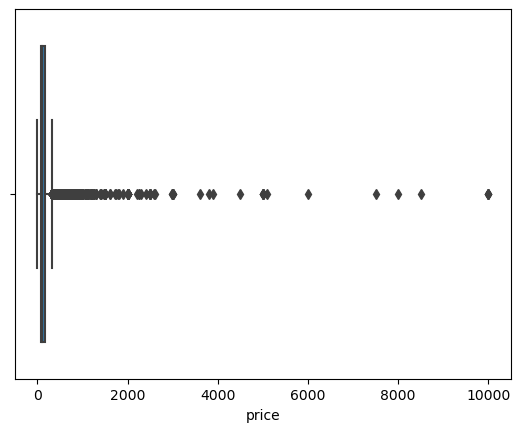

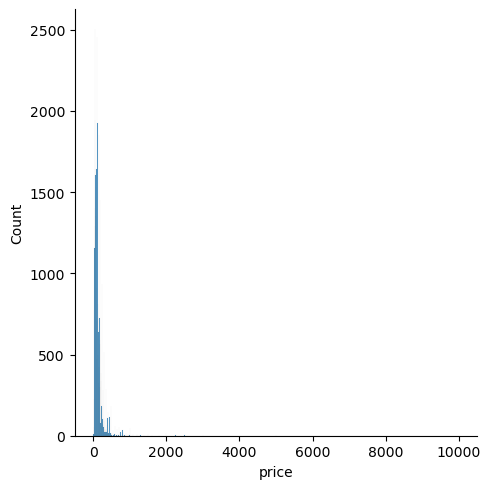

In [102]:
# plot price distribution

sns.boxplot(x='price', data=df)
plt.show();
sns.displot(df, x='price')
plt.show();

We could keep the entire dataset and perform a complete analysis including outlier values. However, to have a more "homogeneous" dataset, we will keep the values between the 5th and 95th percentiles of the data based on price.

In [103]:
# 5th and 95th percentiles

per5 = np.percentile(df["price"], 5)
per90 = np.percentile(df["price"], 90)

In [104]:
# clean dataset based on 5th and 95th percentiles
df = df[(df["price"] >= per5) & (df["price"] <= per90)]

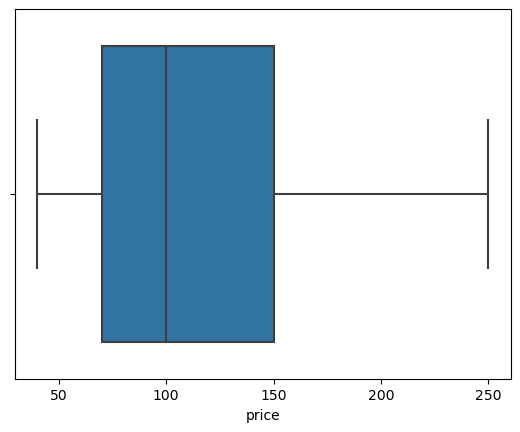

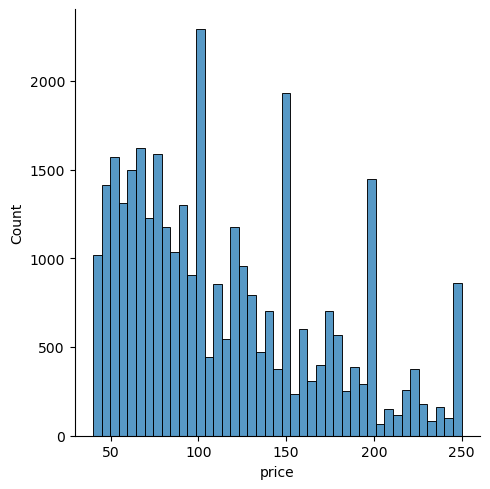

In [105]:
# plot price distribution

sns.boxplot(x="price", data=df)
plt.show();
sns.displot(df, x="price")
plt.show();

In [106]:
# check size

df.shape

(33755, 10)

In [107]:
df.describe()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month
count,3.375500e+04,33755.000000,33755.000000,33755.000000,33755.000000,33755.000000,33755.000000
mean,6.146312e+07,40.728169,-73.950132,113.932247,5.844645,30.234839,1.375714
std,7.378766e+07,0.055347,0.046258,54.915224,17.875491,49.372118,1.693547
min,2.438000e+03,40.506410,-74.244420,40.000000,1.000000,1.000000,0.010000
25%,6.790229e+06,40.688200,-73.981050,70.000000,1.000000,3.000000,0.190000
50%,2.655439e+07,40.720730,-73.953780,100.000000,2.000000,10.000000,0.710000
75%,9.339303e+07,40.763700,-73.934480,150.000000,4.000000,35.000000,2.030000
max,2.738417e+08,40.913060,-73.712990,250.000000,1250.000000,629.000000,58.500000


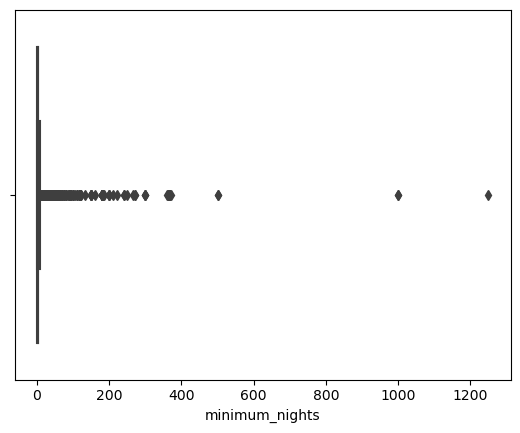

In [108]:
# check minimun_ights distribution

sns.boxplot(x="minimum_nights", data=df)
plt.show();

In [109]:
# clean dataset based on 5th and 95th percentiles

df = df[(df["minimum_nights"] >=  np.percentile(df["minimum_nights"], 5)) & (df["minimum_nights"] <=  np.percentile(df["minimum_nights"], 95))]

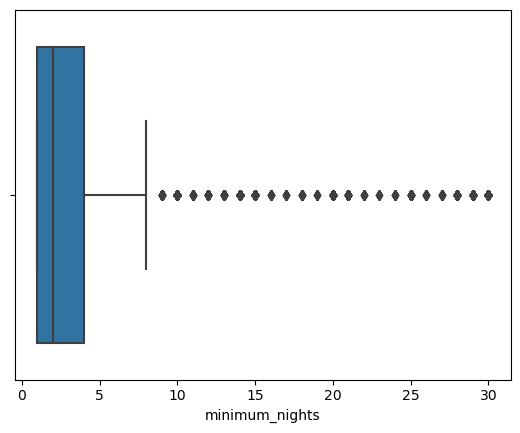

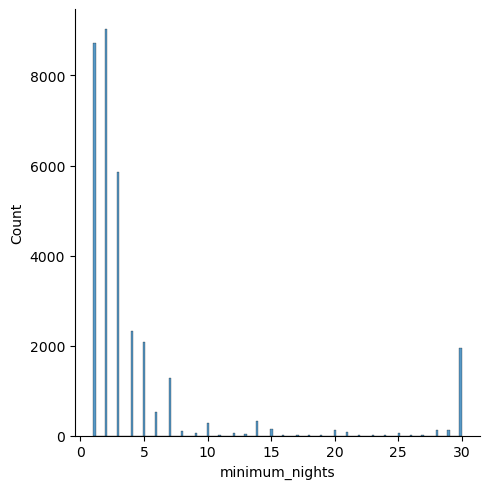

In [110]:
# plot price distribution

sns.boxplot(x="minimum_nights", data=df)
plt.show();
sns.displot(df, x="minimum_nights")
plt.show();

In [111]:
df.shape

(33374, 10)

### Overview cleaning step

* Detection and treatment of NaN values.

* Selection of variables of interest.

* Removal of the column availability_365 due to having too many inconsistent data points.

* Analysis of outliers in price and minimum number of nights.

# Answer business questions

* What is the most common type of property?

* What is the average price per property type?

* What is the average price per neighborhood?

* What is the most common type of property by neighborhood?

* What is the average price per property type and neighborhood?

## What is the most common type of property?

In [112]:
df[['room_type', 'host_id']].groupby('room_type').count()

,host_id
room_type,
Entire home/apt,16750
Private room,16133
Shared room,491


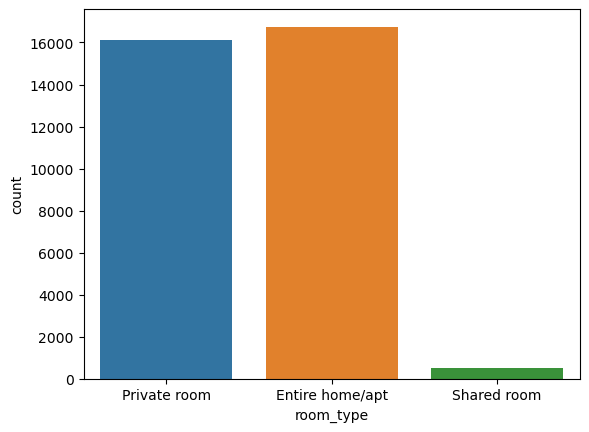

In [113]:
sns.countplot(data=df,x='room_type')
plt.show()

The most common type of property we can find in NY is an entire home/apartment 

## What is the average price per property type?

In [114]:
df[['room_type', 'price']].groupby('room_type').mean()

,price
room_type,
Entire home/apt,148.049134
Private room,79.542057
Shared room,72.105906


We can see that an entire apartment is the most expentive type of property

## What is neighborhood with more properties?

In [115]:
df[['host_id', 'neighbourhood_group']].groupby('neighbourhood_group').count()

,host_id
neighbourhood_group,
Bronx,717
Brooklyn,14548
Manhattan,13804
Queens,4047
Staten Island,258


Brooklyn is the neighborhood with more properties. 

## What is the average price per neighborhood?

In [116]:
df[['price', 'neighbourhood_group']].groupby('neighbourhood_group').mean()

,price
neighbourhood_group,
Bronx,80.075314
Brooklyn,105.020346
Manhattan,132.537525
Queens,88.957499
Staten Island,91.744186


## What is the average price per property type and neighborhood?

In the following table we can see the average price per property type and neighborhood.

In [74]:
df[['room_type', 'price', 'neighbourhood_group']].groupby(['neighbourhood_group', 'room_type']).mean()

price
neighbourhood_group room_type                  
Bronx               Entire home/apt  107.946996
                    Private room      61.980861
                    Shared room       59.812500
Brooklyn            Entire home/apt  139.174756
                    Private room      71.901211
                    Shared room       67.045455
Manhattan           Entire home/apt  163.935266
                    Private room      95.465378
                    Shared room       77.206667
Queens              Entire home/apt  123.149189
                    Private room      66.767842
                    Shared room       58.492063
Staten Island       Entire home/apt  111.624113
                    Private room      67.008696
                    Shared room      112.500000

# Price prediction

In this section we will use a simple linear regression to obtain an approach of the price. In a real project this kind of approach will be a baseline model. 

In [75]:
# obtain dummy variables from categorical ones

cat_var = ['neighbourhood_group','room_type']

for v in cat_var:
    dummies = pd.get_dummies(df[v],prefix=v)
    df = pd.concat([df,dummies],axis=1)
    df.drop([v],axis=1,inplace=True)

df.head()

,host_id,neighbourhood,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,2787,Kensington,40.64749,-73.97237,149,1,9,0.21,0,1,0,0,0,0,1,0
1,2845,Midtown,40.75362,-73.98377,225,1,45,0.38,0,0,1,0,0,1,0,0
3,4869,Clinton Hill,40.68514,-73.95976,89,1,270,4.64,0,1,0,0,0,1,0,0
4,7192,East Harlem,40.79851,-73.94399,80,10,9,0.10,0,0,1,0,0,1,0,0
5,7322,Murray Hill,40.74767,-73.97500,200,3,74,0.59,0,0,1,0,0,1,0,0


In [79]:
df.drop('neighbourhood', axis=1, inplace=True)

In [80]:
# correlations

df.corr()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
host_id,1.000000,0.010677,0.160365,-0.062597,-0.079684,-0.133977,0.285569,0.078207,-0.101043,-0.026903,0.147558,0.043928,-0.094188,0.080141,0.058515
latitude,0.010677,1.000000,0.087782,0.039685,0.038491,-0.006831,-0.017816,0.320824,-0.681258,0.607283,0.025860,-0.185132,-0.047101,0.037207,0.041171
longitude,0.160365,0.087782,1.000000,-0.299689,-0.100195,0.052533,0.155383,0.211989,-0.018108,-0.406221,0.625788,-0.296610,-0.139904,0.141507,-0.006337
price,-0.062597,0.039685,-0.299689,1.000000,0.055489,-0.020166,-0.056710,-0.091081,-0.140856,0.286463,-0.168232,-0.035492,0.626039,-0.604009,-0.092854
minimum_nights,-0.079684,0.038491,-0.100195,0.055489,1.000000,-0.136191,-0.217815,-0.037216,-0.043074,0.102339,-0.067676,-0.017734,0.149488,-0.140121,-0.039216
number_of_reviews,-0.133977,-0.006831,0.052533,-0.020166,-0.136191,1.000000,0.561047,0.012568,0.001134,-0.030514,0.035671,0.011409,-0.014908,0.018358,-0.014285
reviews_per_month,0.285569,-0.017816,0.155383,-0.056710,-0.217815,0.561047,1.000000,0.044190,-0.038380,-0.063232,0.126037,0.029941,-0.049711,0.047148,0.010752
neighbourhood_group_Bronx,0.078207,0.320824,0.211989,-0.091081,-0.037216,0.012568,0.044190,1.000000,-0.130255,-0.124445,-0.055043,-0.013079,-0.031765,0.029528,0.009357
neighbourhood_group_Brooklyn,-0.101043,-0.681258,-0.018108,-0.140856,-0.043074,0.001134,-0.038380,-0.130255,1.000000,-0.738295,-0.326554,-0.077591,-0.015887,0.028475,-0.052211
neighbourhood_group_Manhattan,-0.026903,0.607283,-0.406221,0.286463,0.102339,-0.030514,-0.063232,-0.124445,-0.738295,1.000000,-0.311989,-0.074131,0.076167,-0.088008,0.048975


In [81]:
# define x and y (target variable)

x = df.drop(['price'], axis=1)
y = df['price']

# split train and test dataset
train_x, test_x, train_y, test_y = train_test_split(x,y , test_size=0.3, random_state=42)

In [83]:
# linear regression

linear_model_sk = LinearRegression()  

#fit the model 
linear_model_sk.fit(train_x, train_y)

# score (R^2)
linear_model_sk.score(train_x, train_y)

0.48682808607180694

Very low score. This is because there is no linear correlation between the target value and the regressors. 

In [85]:
# table with real values, predictions and APE (Absolute Percentage Error)

# predictions
pred_y = linear_model_sk.predict(test_x)


ape = abs(100 * (pred_y - test_y) / test_y)
df_out_linear = pd.DataFrame({'Actual': test_y, 'Predicted': pred_y, 'APE (%)': ape})
df_out_linear.head(30)

,Actual,Predicted,APE (%)
46260,55,62.767952,14.123550
30548,45,84.515207,87.811572
1023,125,103.617021,17.106383
4670,125,141.358799,13.087039
14140,50,67.920807,35.841613
25675,151,156.900636,3.907706
40105,125,130.178715,4.142972
41753,202,154.489276,23.520161
23199,150,152.857063,1.904708
1405,148,168.282164,13.704165
